# Big Data Bandits

A Project-Group of the DHBW Karlsruhe participating in a AI-powerd World.

In [9]:
import pandas as pd

from analize import *

Posts:pd.DataFrame = pd.read_csv('./datasets/elonmusk.csv')
Tesla:pd.DataFrame = pd.read_csv('./datasets/tesla.csv')
Dogecoin:pd.DataFrame = pd.read_csv('./datasets/dogecoin.csv')

In [12]:
filter_list = []

influences:pd.DataFrame = pd.DataFrame(columns=['date', 'posts', 'count_posts', 'trend'])
j = 0
old_date = None

for i, Post in Posts.iterrows():
    if not check_filter(str(Post['text']), filter_list, hit=False):
        continue
    else:
        #Convert Datetime-string, to Date-object
        date = datetime.datetime.strptime(str(Post['datetime'])[0:18], '%Y-%m-%d %H:%M:%S').date()

        ret = get_trend(date, Dogecoin)
        if ret == None:
            continue
        
        else:
            trend, avgs, dates, model = ret

            if date != old_date:
                influences.loc[j] = [date] + [[Post['text']]] + [0] + [trend]
                old_date = date
                old_j = j
                j += 1
            else:
                influences.loc[j-1, 'posts'].append(Post['text'])
                influences.loc[j-1, 'count_posts'] += 1


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))

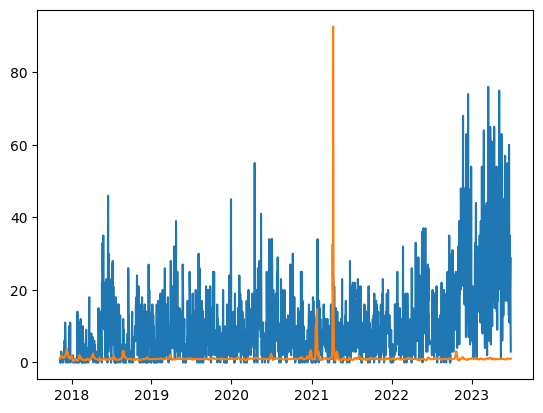

In [25]:
plt.plot(influences['date'], influences['count_posts'])
plt.plot(influences['date'], influences['trend'])